In [1]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 12)

In [2]:
#na_rivers = gpd.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_rivers_lake_centerlines.geojson')
na_rivers = gpd.read_file(r'.\data\NA_Lakes_and_Rivers\hydrography_l_rivers_v2.shp')
na_rivers = na_rivers.to_crs({'init': 'epsg:4269'})
us_states = gpd.read_file(r'http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

In [5]:
print(na_rivers.crs) # output is {'init': 'epsg:4326'}
print(us_states.crs) # output is {'init': 'epsg:4269'}

{'init': 'epsg:4269'}
{'init': 'epsg:4269'}


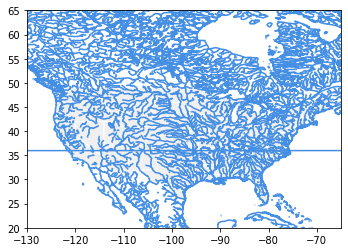

In [6]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='white', color=base_color)
na_rivers.plot(ax=ax, color=line_color, zorder=1);

ax.set(xlim=(-130,-65), ylim=(20,65));

In [7]:
us_states.geom_type.unique()


array(['MultiPolygon', 'Polygon'], dtype=object)

In [8]:
# Create a single polygon object for clipping
#us_poly = us_states.geometry.unary_union
#uk =  world[world.name == "United Kingdom"]
la_state = us_states[us_states.NAME == "Louisiana"]

# Create a new GeoDataFrame by selecting the na_rails that intersect with the us_poly
la_rivers = na_rivers[na_rivers.geometry.intersects(la_state)]

C:\Users\Tanthalis\.conda\envs\module-06\lib\site-packages\geopandas\geoseries.py:330: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


[(28.5, 33.5), (-95, -88.5)]

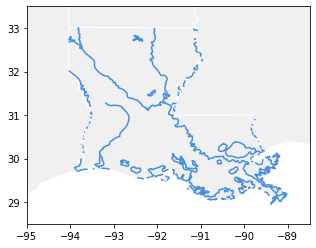

In [9]:
la_poly = la_state.geometry.unary_union
rivers_spatial_index = na_rivers.sindex

# Create a box for the initial intersection
bbox = la_poly.bounds

# Get a list of id's for each road line that overlaps the bounding box
# and subset the data to just those lines
sidx = list(rivers_spatial_index.intersection(bbox))
rivers_sub = na_rivers.iloc[sidx]

# Clip the data - with these data
clipped = rivers_sub.copy()
clipped['geometry'] = rivers_sub.intersection(la_poly)

# clipped layer with no null geometry values
la_rivers_clipped_2 = clipped[clipped.geometry.notnull()]

fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='white', color=base_color)
la_rivers_clipped_2.plot(ax=ax, color=line_color, zorder=1);

ax.set(xlim=(-95,-88.5), ylim=(28.5,33.5))

[(28.5, 33.5), (-95, -88.5)]

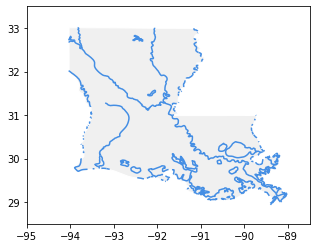

In [10]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

la_state.plot(ax=ax, edgecolor='white', color=base_color)
la_rivers_clipped_2.plot(ax=ax, color=line_color, zorder=1);

ax.set(xlim=(-95,-88.5), ylim=(28.5,33.5))

In [13]:
#Output the clipped Louisiana rivers to our app's data folder
la_rivers_clipped_2.to_file(r'..\data\la_rivers.geojson', driver='GeoJSON')